In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.30)

In [4]:
path = '/home/danilo/Documentos/dataset/archive/COVID-19_Radiography_Dataset'
batch_size = 64;

train_generator = data_generator.flow_from_directory(path, shuffle = True, seed = 13,
                                                     target_size=(64, 64),
                                                     color_mode="rgb",
                                                     class_mode = 'categorical', batch_size=batch_size,
                                                     subset = "training")
validation_generator = data_generator.flow_from_directory(path, shuffle = True, seed = 13,
                                                     target_size=(64, 64),
                                                     color_mode="rgb",
                                                     class_mode = 'categorical', batch_size=batch_size,
                                                     subset = "validation")

Found 29632 images belonging to 4 classes.
Found 12698 images belonging to 4 classes.


In [5]:
def getSamplesFromDataGen(resultData):
    x = resultData.next() #fetch the first batch
    a = x[0] # train data
    b = x[1] # train label
    for i in range(0,6):
        plt.grid(b=None)
        plt.imshow(a[i])
        plt.title(b[i])
        plt.show() 


/tmp/ipykernel_6294/1766510520.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


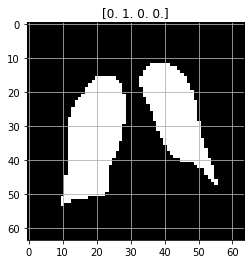

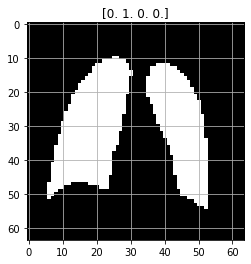

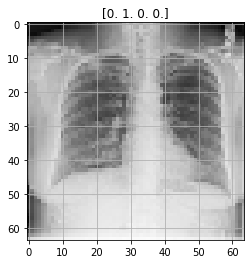

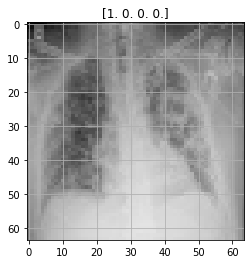

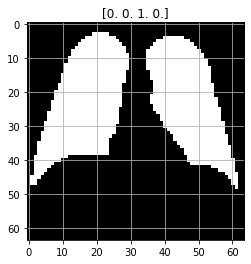

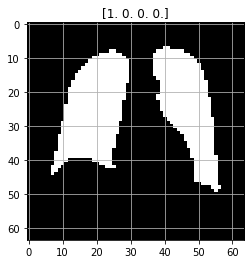

In [6]:
getSamplesFromDataGen(train_generator)

In [11]:
model = keras.Sequential()
model.add(layers.Conv2D(16, (3,3), input_shape = (64, 64, 3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3,3), input_shape = (64, 64, 3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), input_shape = (64, 64, 3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), input_shape = (64, 64, 3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())

model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(4, activation= 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 32)       

In [12]:
earlyStopping = EarlyStopping(monitor = 'val_loss', patience = 70, mode = 'min', restore_best_weights = True)

In [14]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_generator, validation_data=validation_generator, 
                      epochs=50, batch_size = 64)

Epoch 1/50
463/463 [==============================] - 65s 140ms/step - loss: 0.9498 - accuracy: 0.6008 - val_loss: 0.8160 - val_accuracy: 0.6484
Epoch 2/50
463/463 [==============================] - 47s 102ms/step - loss: 0.7728 - accuracy: 0.6796 - val_loss: 0.6825 - val_accuracy: 0.7185
Epoch 3/50
463/463 [==============================] - 47s 102ms/step - loss: 0.7190 - accuracy: 0.7083 - val_loss: 0.6552 - val_accuracy: 0.7391
Epoch 4/50
463/463 [==============================] - 47s 101ms/step - loss: 0.6839 - accuracy: 0.7227 - val_loss: 0.5940 - val_accuracy: 0.7746
Epoch 5/50
463/463 [==============================] - 47s 101ms/step - loss: 0.6590 - accuracy: 0.7371 - val_loss: 0.5481 - val_accuracy: 0.7844
Epoch 6/50
463/463 [==============================] - 47s 101ms/step - loss: 0.6420 - accuracy: 0.7394 - val_loss: 0.5191 - val_accuracy: 0.8016
Epoch 7/50
463/463 [==============================] - 47s 102ms/step - loss: 0.6272 - accuracy: 0.7474 - val_loss: 0.5711 - val_ac

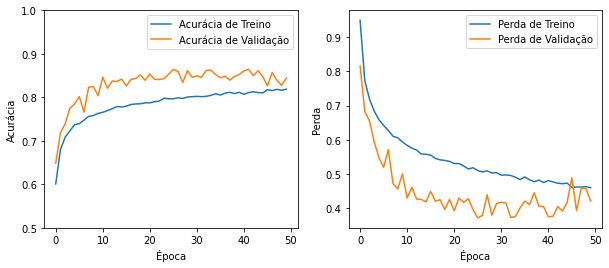

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label = 'Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.show()